In [1]:
%pip install scikit-learn pandas matplotlib seaborn


Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load processed datasets
train_df = pd.read_csv("anomalies/anomalies_train_updated.csv")
test_df = pd.read_csv("anomalies/anomalies_test_updated.csv")
predict_df = pd.read_csv("anomalies/anomalies_predict_updated.csv")

In [3]:
# Step 1: Select relevant features for modeling
features = ['response_time', 'status_code']  # Add or remove features as needed

# Drop rows with missing values in important features
train_df = train_df.dropna(subset=features)
test_df = test_df.dropna(subset=features)
predict_df = predict_df.dropna(subset=features)

X_train = train_df[features]
X_test = test_df[features]
X_predict = predict_df[features]

print("Done rendering and processing these files")

Done rendering and processing these files


In [30]:
# Initialize and train the Isolation Forest model
model = IsolationForest(contamination=0.03, random_state=42)  # Adjust contamination as needed
model.fit(X_train)

# Define a range of contamination values
contamination_values = [0.005, 0.01, 0.02, 0.03, 0.04, 0.05]

# Dictionary to store results
results = {}

# Train Isolation Forest for each contamination value
for contamination in contamination_values:
    print(f"Testing contamination: {contamination}")
    model = IsolationForest(contamination=contamination, random_state=42)
    model.fit(X_train)
    
    # Predict anomalies
    train_df['is_anomalous_iso_f'] = model.predict(X_train)
    # test_df['is_anomalous'] = model.predict(X_test)
    # predict_df['is_anomalous'] = model.predict(X_predict)
    
    # Convert predictions to boolean
    train_df['is_anomalous_iso_f'] = train_df['is_anomalous_iso_f'] == -1
    # test_df['is_anomalous'] = test_df['is_anomalous'] == -1
    # predict_df['is_anomalous'] = predict_df['is_anomalous'] == -1
        
    # Summary of anomalies
    print("Anomalies in Train Dataset:", train_df['is_anomalous_iso_f'].sum())
    # print("Anomalies in Test Dataset:", test_df['is_anomalous'].sum())
    # print("Anomalies in Predict Dataset:", predict_df['is_anomalous'].sum())
    
    # trying out for only one dataset
    results[contamination] = train_df['is_anomalous_iso_f'].sum()

# Display results
for contamination, count in results.items():
    print(f"Contamination: {contamination} | Anomalies Detected: {count}")



Testing contamination: 0.005
Anomalies in Train Dataset: 310
Testing contamination: 0.01
Anomalies in Train Dataset: 622
Testing contamination: 0.02
Anomalies in Train Dataset: 1254
Testing contamination: 0.03
Anomalies in Train Dataset: 1867
Testing contamination: 0.04
Anomalies in Train Dataset: 2505
Testing contamination: 0.05
Anomalies in Train Dataset: 3133
Contamination: 0.005 | Anomalies Detected: 310
Contamination: 0.01 | Anomalies Detected: 622
Contamination: 0.02 | Anomalies Detected: 1254
Contamination: 0.03 | Anomalies Detected: 1867
Contamination: 0.04 | Anomalies Detected: 2505
Contamination: 0.05 | Anomalies Detected: 3133


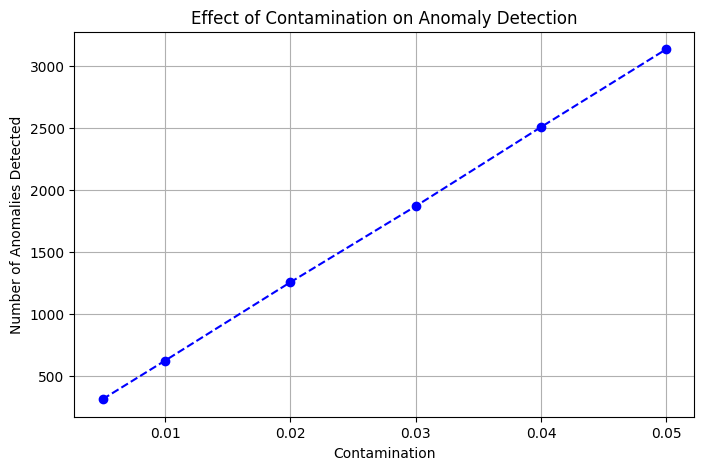

In [27]:
# Plot the results
plt.figure(figsize=(8, 5))
plt.plot(results.keys(), results.values(), marker='o', linestyle='--', color='b')
plt.title("Effect of Contamination on Anomaly Detection")
plt.xlabel("Contamination")
plt.ylabel("Number of Anomalies Detected")
plt.grid()
plt.show()


In [31]:
# using optimal contamination
final_contamination = 0.03  # Replace with the chosen value
final_model = IsolationForest(contamination=final_contamination, random_state=42)
final_model.fit(X_train)

# Predict on test and predict datasets
test_df['is_anomalous_iso_f'] = final_model.predict(X_test) == -1
predict_df['is_anomalous_iso_f'] = final_model.predict(X_predict) == -1

# Save results
test_df.to_csv("isolation-forest/test_with_final_anomalies.csv", index=False)
predict_df.to_csv("isolation-forest/predict_with_final_anomalies.csv", index=False)

print("Final results saved with optimal contamination value.")


Final results saved with optimal contamination value.
